## HDB Resale Flat by Flat-Type

### Aim: What is the HDB Resale Flat by Flat-Type over the last 3 years? 

### Dataset

#### This dataset shows the resale price transactions based on the registration of the resale transactions, which comprises of month, town, flat type, block, street name, storey range, floor area, flat model, lease commencement date, lease remaining period, and the resale price variables.

#### Chart Type: Box Plot

#### Source: https://data.gov.sg/dataset/resale-flat-prices

### Methodology

#### Step 1: Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Step 2: Import the required dataset

In [2]:
filename = 'C:\\Users\Jeffrey Wong\SP_Assignment_Python\HDB_resale_flat_prices.csv'

data = np.genfromtxt(filename, skip_header = 1, dtype = [('month', 'U10'), ('town', 'U50'),
                                                        ('flat_type', 'U10'), ('block', 'U10'),
                                                        ('street_name', 'U50'), ('storey_range', 'U50'),
                                                        ('floor_area_sqm', 'i8'), ('flat_model', 'U50'),
                                                        ('lease_commence_date', 'U10'), ('remaining_lease', 'i8'),
                                                        ('resale_price', 'f8')], 
                     delimiter = ',', missing_values = ['na', '-', ''], filling_values = 0)

##### Use subsetting with boolean indexing to determine the exact location of the data of an element on each monthly year and store the indexing values into assigned variables respectively

In [3]:
### get the index of an element for the first month in year 2016
index_2016 = np.where(data['month'] == '2016-01')
if len(index_2016) > 0 and len(index_2016[0]) > 0:
    position_2016 = index_2016[0][0]

### get the index of an element for the first month in year 2017 
index_2017 = np.where(data['month'] == '2017-01')
if len(index_2017) > 0 and len(index_2017[0]) > 0:
    position_2017 = index_2017[0][0]

### get the index of an element for the first month in year 2018
index_2018 = np.where(data['month'] == '2018-01')
if len(index_2018) > 0 and len(index_2018[0]) > 0:
    position_2018 = index_2018[0][0]

### get the index of an element for the first month in year 2019
index_2019 = np.where(data['month'] == '2019-01')
if len(index_2019) > 0 and len(index_2019[0]) > 0:
    position_2019 = index_2019[0][0]

##### Extract the relevant data using the indexing values above (through slicing) for each year and store them into assigned variables respectively

In [4]:
year_2016 = data[position_2016:position_2017]
year_2017 = data[position_2017:position_2018]
year_2018 = data[position_2018:position_2019]

##### Extract the unique flat type from the dataset

In [5]:
unique_flat_type = np.unique(data['flat_type'])
print(unique_flat_type)

['1 ROOM' '2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' 'MULTI-GENE']


##### Use subsetting to extract the resale price based on the unique flat type, and compute the whole set of data corresponding to the respective unique flat type to derive the total average resale price and store the total average resale price corresponding to the unique flat type through the empty numpy array

In [6]:
### for year 2016
data_2016 = []
for flat_types in unique_flat_type:
    data_2016.append(year_2016[year_2016['flat_type'] == flat_types]['resale_price']) # by subsetting 
data_for_2016 = np.nan_to_num(np.array(data_2016)) # convert from list to 1-dimensional array & from NaN to value

### for year 2017
data_2017 = []
for flat_types in unique_flat_type:
    data_2017.append(year_2017[year_2017['flat_type'] == flat_types]['resale_price']) # by subsetting
data_for_2017 = np.nan_to_num(np.array(data_2017)) # convert from list to 1-dimensional array & from NaN to value

### for year 2018
data_2018 = []
for flat_types in unique_flat_type:
    data_2018.append(year_2018[year_2018['flat_type'] == flat_types]['resale_price']) # by subsetting
data_for_2018 = np.nan_to_num(np.array(data_2018)) # convert from list to 1-dimensional array & from NaN to value

### use for plotting box plots
combined_data = [data_for_2016, data_for_2017, data_for_2018]

#### Step 4: Data Visualization on Matplotlib

##### Define the function to create and display the multiple box plots 

In [7]:
def box_plot (combined_data):
    fig, ax = plt.subplots(3, 1, figsize = (15, 15))

    fill_color = ['#ff66ff', '#1aff66', '#ff9900']
    edge_markercolor = ['#66ccff', '#ff751a', '#ff0066']
    years = ['2016', '2017', '2018']

    ### create the multiple subplots using for loops 
    for i in range (3):
            bp = ax[i].boxplot(combined_data[i], vert = False, labels = unique_flat_type, patch_artist = True)

            ### change outline color, fill color and linewidth of the boxes
            for box in bp['boxes']:
                # change outline color
                box.set(color = 'black', linewidth = 2)
                # change fill color
                box.set(facecolor = fill_color[i])

            ### change color and linewidth of the whiskers
            for whisker in bp['whiskers']:
                whisker.set(color = 'black', linewidth = 2)

            ### change color and linewidth of the caps
            for cap in bp['caps']:
                cap.set(color = 'black', linewidth = 2)

            ### change color and linewidth of the medians
            for median in bp['medians']:
                median.set(color = 'black', linewidth = 2)

            ### change the style of fliers and their fill
            for flier in bp['fliers']:
                flier.set(marker = 'o', markersize = 8, markeredgecolor = edge_markercolor[i])

            ### add title and axes labels
            fig.suptitle("HDB Resale Price By Flat Type, Year 2016, 2017 and 2018", fontsize = 15, fontweight = 'bold')
            ax[i].set_title(years[i], fontweight = 'bold', fontsize = 15, color = 'black')
            ax[i].set_xlabel('Resale Price (S$)', fontsize = 15, fontweight = 'bold')
            ax[i].set_ylabel('Flat Type', fontsize = 15, fontweight = 'bold')

            ### adjust both axes ticks values
            ax[i].tick_params(axis = "both", labelsize = 12, length = 10, width = 2.0, labelcolor = 'black', colors = 'red')
            
            ax[i].set_xlim(150000, 1200000)
    
    plt.tight_layout(pad = 4.0)
    
    fig.savefig('boxplot.png')
    plt.show()

##### Call the function to create and display the multiple box plots

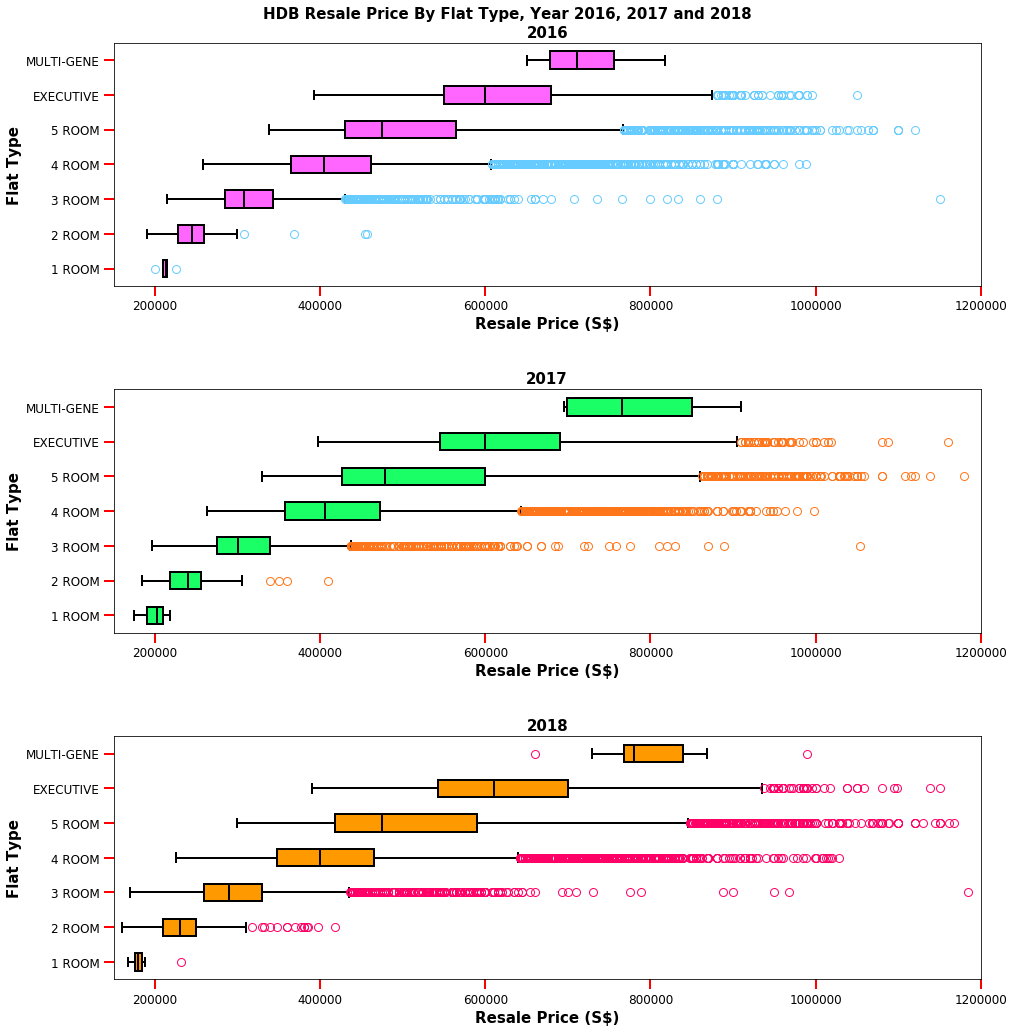

In [8]:
box_plot(combined_data)

#### Simple Text-Based Analysis using Numpy

In [10]:
print("****** HDB Resale Flat Price by Flat Type ******")
print()

### display the total number of rows of data in this dataset 
num_of_rows = len(data)
print("There is a total of " + str(num_of_rows) + " rows in this dataset extracted from " + filename)
print()

### display the total number of rows of data extracted for all respective years from year 2016 to 2018
print("Total number of rows of data extracted for all respective years from 2016 to 2018:")
print("  Year                               2016           2017          2018")
print("=========                          =========      =========     =========")
print("Total number of rows of data:        " + str(len(year_2016)) + "          " + str(len(year_2017)) + "         " + str(len(year_2018)))
print()

### display the total number of data extracted by flat types on all respective years from 2016 to 2018
print("Total number of HDB resale prices recorded by flat types for all respective years from 2016 to 2018")
print("For year 2016:")
for i in range(len(unique_flat_type)):
    print(unique_flat_type[i] + " : " + str(len(data_for_2016[i])))
print()

print("For year 2017:")
for i in range(len(unique_flat_type)):
    print(unique_flat_type[i] + " : " + str(len(data_for_2017[i])))
print()

print("For year 2018: ")
for i in range(len(unique_flat_type)):
    print(unique_flat_type[i] + " : " + str(len(data_for_2018[i])))
print()


### display the basic descriptive statistics by flat types on all respective years from 2016 to 2018
print("Basic Descriptive Statistics: ")
print("===================================")

### for year 2016
print("For year 2016:")
print("Flat Type              Max (S$)        Min (S$)      Range(S$)     Average(S$)       Median(S$)        25%          75%")
print("------------------------------------------------------------------------------------------------------------------------------")

for i in range(len(unique_flat_type)):
    print("{}                {:.2f}       {:.2f}      {:.2f}      {:.2f}         {:.2f}      {:.2f}  {:.2f}".format(unique_flat_type[i], data_for_2016[i].max(),
                                                                                                                       data_for_2016[i].min(), 
                                                                                                                       (data_for_2016[i].max() - data_for_2016[i].min()), 
                                                                                                                       data_for_2016[i].mean(), 
                                                                                                                       np.median(data_for_2016[i]),
                                                                                               np.percentile(data_for_2016[i],25), np.percentile(data_for_2016[i], 75)))

print()
print("Flat Type              IQR(S$)          Upper Outlier(S$)      Lower Outlier(S$) ")
print("--------------------------------------------------------------------------------")

for i in range(len(unique_flat_type)):
    print("{}               {:.2f}            {:.2f}             {:.2f}".format(unique_flat_type[i], (np.percentile(data_for_2016[i], 75) - 
                                                                                                np.percentile(data_for_2016[i],25)),
                                                                          (np.percentile(data_for_2016[i], 75)+1.5*(np.percentile(data_for_2016[i], 75) - 
                                                                                                                    np.percentile(data_for_2016[i],25))), 
                                                                          (np.percentile(data_for_2016[i], 25)-1.5*(np.percentile(data_for_2016[i], 75) - 
                                                                                                                    np.percentile(data_for_2016[i],25)))))
print()



### for year 2017
print("For year 2017:")
print("Flat Type              Max (S$)        Min (S$)      Range(S$)     Average(S$)       Median(S$)        25%          75%")
print("------------------------------------------------------------------------------------------------------------------------------")

for i in range(len(unique_flat_type)):
    print("{}                {:.2f}       {:.2f}      {:.2f}      {:.2f}         {:.2f}      {:.2f}   {:.2f}".format(unique_flat_type[i], data_for_2017[i].max(),
                                                                                                                       data_for_2017[i].min(), 
                                                                                                                       (data_for_2017[i].max() - data_for_2017[i].min()), 
                                                                                                                       data_for_2017[i].mean(), 
                                                                                                                       np.median(data_for_2017[i]),
                                                                                               np.percentile(data_for_2017[i],25), np.percentile(data_for_2017[i], 75)))

print()
print("Flat Type              IQR(S$)          Upper Outlier(S$)      Lower Outlier(S$) ")
print("--------------------------------------------------------------------------------")

for i in range(len(unique_flat_type)):
    print("{}               {:.2f}            {:.2f}             {:.2f}".format(unique_flat_type[i], (np.percentile(data_for_2017[i], 75) - 
                                                                                                np.percentile(data_for_2017[i],25)),
                                                                          (np.percentile(data_for_2017[i], 75)+1.5*(np.percentile(data_for_2017[i], 75) - 
                                                                                                                    np.percentile(data_for_2017[i],25))), 
                                                                          (np.percentile(data_for_2017[i], 25)-1.5*(np.percentile(data_for_2017[i], 75) - 
                                                                                                                    np.percentile(data_for_2017[i],25)))))
print()


### for year 2018
print("For year 2018:")
print("Flat Type              Max (S$)        Min (S$)      Range(S$)     Average(S$)       Median(S$)        25%          75%")
print("------------------------------------------------------------------------------------------------------------------------------")

for i in range(len(unique_flat_type)):
    print("{}                {:.2f}       {:.2f}      {:.2f}      {:.2f}         {:.2f}      {:.2f}  {:.2f}".format(unique_flat_type[i], data_for_2018[i].max(),
                                                                                                                       data_for_2018[i].min(), 
                                                                                                                       (data_for_2018[i].max() - data_for_2018[i].min()), 
                                                                                                                       data_for_2018[i].mean(), 
                                                                                                                       np.median(data_for_2018[i]),
                                                                                               np.percentile(data_for_2018[i],25), np.percentile(data_for_2018[i], 75)))

print()
print("Flat Type              IQR(S$)          Upper Outlier(S$)      Lower Outlier(S$) ")
print("--------------------------------------------------------------------------------")

for i in range(len(unique_flat_type)):
    print("{}               {:.2f}            {:.2f}             {:.2f}".format(unique_flat_type[i], (np.percentile(data_for_2018[i], 75) - 
                                                                                                np.percentile(data_for_2018[i],25)),
                                                                          (np.percentile(data_for_2018[i], 75)+1.5*(np.percentile(data_for_2018[i], 75) - 
                                                                                                                    np.percentile(data_for_2018[i],25))), 
                                                                          (np.percentile(data_for_2018[i], 25)-1.5*(np.percentile(data_for_2018[i], 75) - 
                                                                                                                    np.percentile(data_for_2018[i],25)))))
print()


### describing the shape of distribution 
print("Distribution for HDB Resale Flat Price by Flat Type for respective years: ")
print("Year 2016: ")
print("==============")
for j in range(len(unique_flat_type)):
    if np.mean(data_for_2016[j]) == np.median(data_for_2016[j]):
        print(unique_flat_type[j] + " is in symmetrical distribution." )
    elif np.mean(data_for_2016[j]) > np.median(data_for_2016[j]):
        print(unique_flat_type[j] + " is in positively skewed distribution.")
    elif np.mean(data_for_2016[j]) < np.median(data_for_2016[j]):
        print(unique_flat_type[j] + " is in negatively skewed distribution.")
print()

print("Year 2017: ")
print("==============")
for j in range(len(unique_flat_type)):
    if np.mean(data_for_2017[j]) == np.median(data_for_2017[j]):
        print(unique_flat_type[j] + " is in symmetrical distribution." )
    elif np.mean(data_for_2017[j]) > np.median(data_for_2017[j]):
        print(unique_flat_type[j] + " is in positively skewed distribution.")
    elif np.mean(data_for_2017[j]) < np.median(data_for_2017[j]):
        print(unique_flat_type[j] + " is in negatively skewed distribution.")
print()

print("Year 2018: ")
print("==============")
for j in range(len(unique_flat_type)):
    if np.mean(data_for_2018[j]) == np.median(data_for_2018[j]):
        print(unique_flat_type[j] + " is in symmetrical distribution." )
    elif np.mean(data_for_2018[j]) > np.median(data_for_2018[j]):
        print(unique_flat_type[j] + " is in positively skewed distribution.")
    elif np.mean(data_for_2018[j]) < np.median(data_for_2018[j]):
        print(unique_flat_type[j] + " is in negatively skewed distribution.")
print()

****** HDB Resale Flat Price by Flat Type ******

There is a total of 83598 rows in this dataset extracted from C:\Users\Jeffrey Wong\SP_Assignment_Python\HDB_resale_flat_prices.csv

Total number of rows of data extracted for all respective years from 2016 to 2018:
  Year                               2016           2017          2018
=========                          =========      =========     =========
Total number of rows of data:        19373          20351         21569

Total number of HDB resale prices recorded by flat types for all respective years from 2016 to 2018
For year 2016:
1 ROOM : 5
2 ROOM : 202
3 ROOM : 5038
4 ROOM : 8050
5 ROOM : 4585
EXECUTIVE : 1489
MULTI-GENE : 4

For year 2017:
1 ROOM : 9
2 ROOM : 219
3 ROOM : 5035
4 ROOM : 8504
5 ROOM : 4960
EXECUTIVE : 1620
MULTI-GENE : 4

For year 2018: 
1 ROOM : 9
2 ROOM : 288
3 ROOM : 5121
4 ROOM : 8770
5 ROOM : 5490
EXECUTIVE : 1876
MULTI-GENE : 15

Basic Descriptive Statistics: 
For year 2016:
Flat Type              Max